## SETTING UP AND LOADING LIBRARIES


In [0]:
from pyspark.sql.session import SparkSession
from matplotlib import pyplot as plt
from operator import add
import csv

# Creating SparkSession
spark = SparkSession(sc)

In [0]:
# Displaying the list of files and directories
dbutils.fs.ls("dbfs:/FileStore/tables")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1709140755000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-2.csv', name='Occupancy_Detection_Data-2.csv', size=50968, modificationTime=1709140859000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709137657000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710959775000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1706719797000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-2.zip', name='accounts-2.

In [0]:
# Copying file "clinicaltrial_2020.zip" from DBFS to local file system for unzipping
dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")

True

In [0]:
# Copying file "clinicaltrial_2021.zip" from DBFS to local file system for unzipping
dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")

True

In [0]:
# Copying file "clinicaltrial_2023.zip" from DBFS to local file system for unzipping
dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")

True

In [0]:
# Copying file "pharma.zip" from DBFS to local file system
dbutils.fs.cp("dbfs:/FileStore/tables/pharma.zip", "file:/tmp/")

True

In [0]:
# Listing files in the local /tmp/ directory
dbutils.fs.ls("file:/tmp/")

[FileInfo(path='file:/tmp/hsperfdata_root/', name='hsperfdata_root/', size=4096, modificationTime=1714581284728),
 FileInfo(path='file:/tmp/driver-daemon-params', name='driver-daemon-params', size=19, modificationTime=1714581220501),
 FileInfo(path='file:/tmp/.Test-unix/', name='.Test-unix/', size=4096, modificationTime=1714581184978),
 FileInfo(path='file:/tmp/clinicaltrial_2021.zip', name='clinicaltrial_2021.zip', size=11508457, modificationTime=1714583692349),
 FileInfo(path='file:/tmp/.ICE-unix/', name='.ICE-unix/', size=4096, modificationTime=1714581184978),
 FileInfo(path='file:/tmp/driver-env.sh', name='driver-env.sh', size=3459, modificationTime=1714581218625),
 FileInfo(path='file:/tmp/clinicaltrial_2023.zip', name='clinicaltrial_2023.zip', size=57166668, modificationTime=1714583693753),
 FileInfo(path='file:/tmp/tmp.8KYRm4oaYp', name='tmp.8KYRm4oaYp', size=0, modificationTime=1714581192593),
 FileInfo(path='file:/tmp/chauffeur-daemon-params', name='chauffeur-daemon-params', s

In [0]:
%sh
ls /tmp/

Rserv
RtmpN9UfCP
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-5b98cb19690f4f78bef9e913d86a1c28-systemd-logind.service-AnshQX
systemd-private-5b98cb19690f4f78bef9e913d86a1c28-systemd-resolved.service-WYSgyv
tmp.8KYRm4oaYp


In [0]:
%sh
unzip -d /tmp/ /tmp/clinicaltrial_2020.zip
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
# Creating a directory in DBFS
dbutils.fs.mkdirs("dbfs:/FileStore/tables")

True

In [0]:
# Moving file from /tmp to /tables in DBFS
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "dbfs:/FileStore/tables/clinicaltrial_2020.csv")

True

In [0]:
# Move file from /tmp to /tables in DBFS
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "dbfs:/FileStore/tables/clinicaltrial_2021.csv")


True

In [0]:
# Move file from /tmp to /tables in DBFS
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "dbfs:/FileStore/tables/clinicaltrial_2023.csv")


True

In [0]:
# Move file from /tmp to /tables in DBFS
dbutils.fs.mv("file:/tmp/pharma.csv", "FileStore/tables/pharma.csv")

True

# Data Cleaning and Preparation

In [0]:
# Defining file paths
clinicaltrial_2020 = 'dbfs:/FileStore/tables/clinicaltrial_2020.csv'
clinicaltrial_2021 = 'dbfs:/FileStore/tables/clinicaltrial_2021.csv'
clinicaltrial_2023 = 'dbfs:/FileStore/tables/clinicaltrial_2023.csv'
pharma = 'dbfs:/FileStore/tables/pharma.csv'

In [0]:
# Finding the index of the last '/' in the clinicaltrial_2023 path
id = clinicaltrial_2023.rfind('/')

# Defining the target directory path
FileStoreTableDirectory = 'FileStore/tables'

# Extracting the filename from clinicaltrial_2023 path and append it to the directory
clinicalTrial = FileStoreTableDirectory + clinicaltrial_2023[id+1:]


In [0]:
# Checking if clinicaltrial_2023 directory exists in DBFS
try:
    dbutils.fs.ls(clinicaltrial_2023)
except:
    # If clinicaltrial_2023 directory does not exist, copy files
    dbutils.fs.cp(clinicalTrial, clinicaltrial_2023)  # Copy clinicalTrial file to clinicaltrial_2023
    dbutils.fs.cp('FileStore/tables/pharma.csv', pharma)  # Copy pharma.csv to pharma directory


In [0]:
# Reading the csv file text with sc.textFile to return an RDDD
clinicaltrial_2020 = sc.textFile(clinicaltrial_2020)\
                     .map(lambda line: line.split('|'))\
                     .filter(lambda line: len(line)>1)

In [0]:
# Reading the csv file text with sc.textFile to return an RDDD
clinicaltrial_2021 = sc.textFile(clinicaltrial_2021)\
                     .map(lambda line: line.split('|'))\
                     .filter(lambda line: len(line)>1)

In [0]:
# Reading the csv file text with sc.textFile to return an RDDD without line spliting
clinicaltrial_2023 = sc.textFile(clinicaltrial_2023)

In [0]:
clinicaltrial_2023.take(5)

['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# Define a custom function to clean and split each line
def clean_and_split_rdd(line, fill_missing=False):
    # Replace double quotes with an empty string
    cleaned_line = line.replace('"', '')

    # Remove trailing commas
    cleaned_line = cleaned_line.rstrip(',')

    # Split the line using tabs
    fields = cleaned_line.split('\t')

    # Fill missing values if required
    if fill_missing:
        while len(fields) < 14:  # Adjust the number as needed
            fields.append("N/A")  # Or any other appropriate placeholder

    return fields


In [0]:
# Apply the custom function to clean and split each line
clinicaltrial_2023WithHeader = clinicaltrial_2023.map(lambda x: clean_and_split_rdd(x, fill_missing=True))

# Extract header from the first row
header_rdd = clinicaltrial_2023WithHeader.first()
header_rdd1 = clinicaltrial_2021.first()
header_rdd2 = clinicaltrial_2020.first()

# Filter out the header from the RDD
clinicaltrial_2023 = clinicaltrial_2023WithHeader.filter(lambda row: row != header_rdd)
clinicaltrial_2021 = clinicaltrial_2021.filter(lambda row: row != header_rdd1)
clinicaltrial_2020 = clinicaltrial_2020.filter(lambda row: row != header_rdd2)

In [0]:
# Using collect() to retrieve all rows as a list
clinicaltrial_2020.collect()

[['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  ''],
 ['NCT02757209',
  'Consorzio Futuro in Ricerca',
  'Completed',
  'Apr 2016',
  'Jan 2018',
  'Interventional',


In [0]:
# Using collect() to retrieve all rows as a list
clinicaltrial_2021.collect()

[['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  ''],
 ['NCT02757209',
  'Consorzio Futuro in Ricerca',
  'Completed',
  'Apr 2016',
  'Jan 2018',
  'Interventional',


In [0]:
# Using collect() to retrieve all rows as a list
clinicaltrial_2023.collect()

[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocat

In [0]:
header_rdd2

['Id',
 'Sponsor',
 'Status',
 'Start',
 'Completion',
 'Type',
 'Submission',
 'Conditions',
 'Interventions']

In [0]:
header_rdd1

['Id',
 'Sponsor',
 'Status',
 'Start',
 'Completion',
 'Type',
 'Submission',
 'Conditions',
 'Interventions']

In [0]:
header_rdd

['Id',
 'Study Title',
 'Acronym',
 'Status',
 'Conditions',
 'Interventions',
 'Sponsor',
 'Collaborators',
 'Enrollment',
 'Funder Type',
 'Type',
 'Study Design',
 'Start',
 'Completion']

## PROBLEM ANSWERS

## QUESTION 1
The number of studies in the dataset.

In [0]:
# Numbers of studies in a dataset
clinicaltrial_2023.count()

483422

In [0]:
# Assuming clinicaltrial_2023 is your RDD
distinct_studies_count = clinicaltrial_2023.map(lambda x: x[0]).distinct().count()

# Displaying the number of distinct studies
print(f'The number of distinct studies in the dataset: {distinct_studies_count}')


The number of distinct studies in the dataset: 483422


In [0]:
# Numbers of studies in a dataset
clinicaltrial_2020.count()
clinicaltrial_2021.count()

# Assuming clinicaltrial_2023 is your RDD
distinct_studies_count1 = clinicaltrial_2020.map(lambda x: x[0]).distinct().count()
distinct_studies_count2 = clinicaltrial_2021.map(lambda x: x[0]).distinct().count()

# Displaying the number of distinct studies
print(f'The number of distinct studies in the dataset: {distinct_studies_count1}')
print(f'The number of distinct studies in the dataset: {distinct_studies_count2}')


The number of distinct studies in the dataset: 356466
The number of distinct studies in the dataset: 387261


## QUESTION 2
List all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
typ_inx = header_rdd.index('Type')
print(f"Type Index: {typ_inx}")

Type Index: 10


In [0]:
clinicaltrial_2023.filter(lambda col: len(col) > typ_inx) \
.map(lambda col: col[typ_inx]) \
.filter(lambda x: x!= '') \
.map(lambda x: (x, 1)) \
.reduceByKey(add) \
.map(lambda x: (x[1], x[0])) \
.sortByKey(ascending=False) \
.map(lambda x: (x[1], x[0])).collect()

[('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928),
 ('N/A', 2)]

## QUESTION 3
The top 5 conditions (from Conditions) with their frequencies

In [0]:
# Dictionary mapping dataset names to their respective delimiters
conditions_delimiter = {
    "clinicaltrial_2023": "|",
    "clinicaltrial_2021": ",",
    "clinicaltrial_2020": ",",
}

In [0]:
# Get the index of the "Conditions" column
conditions_column_index = clinicaltrial_2023WithHeader.first().index('Conditions')
print(f"Conditions: {conditions_column_index}")

Conditions: 4


In [0]:
# Split conditions based on the delimiter for the current dataset,
# filter out header and empty rows, map each condition to a tuple (condition, 1),
# then reduce by key to count the frequencies and take the top 5 most frequent conditions
top_conditions = clinicaltrial_2023WithHeader \
    .flatMap(lambda x: x[conditions_column_index].split(conditions_delimiter["clinicaltrial_2023"])) \
    .filter(lambda row: row != 'Conditions') \
    .filter(lambda row: row != '') \
    .map(lambda x: (x, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(5)

In [0]:
# Displaying the results
for condition, frequency in top_conditions:
    print(f"{condition}: {frequency} trials")

Healthy: 9731 trials
Breast Cancer: 7502 trials
Obesity: 6549 trials
Stroke: 4072 trials
Hypertension: 4020 trials


## QUESTION 4
10 most common sponsors that are not pharmaceutical companies + the number of clinical trials sponsored.

In [0]:
# Read the pharmaceutical companies data from the file
pharma = sc.textFile(pharma) \
    .map(lambda line: line.split(',')) \
    .filter(lambda line: len(line) > 1)

In [0]:
# Extract the header from pharmaceutical companies data
pharma_header = pharma.first()
pharma = pharma.filter(lambda x: x != pharma_header)

In [0]:
pharma_header

['"Company"',
 '"Parent_Company"',
 '"Penalty_Amount"',
 '"Subtraction_From_Penalty"',
 '"Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting"',
 '"Penalty_Year"',
 '"Penalty_Date"',
 '"Offense_Group"',
 '"Primary_Offense"',
 '"Secondary_Offense"',
 '"Description"',
 '"Level_of_Government"',
 '"Action_Type"',
 '"Agency"',
 '"Civil/Criminal"',
 '"Prosecution_Agreement"',
 '"Court"',
 '"Case_ID"',
 '"Private_Litigation_Case_Title"',
 '"Lawsuit_Resolution"',
 '"Facility_State"',
 '"City"',
 '"Address"',
 '"Zip"',
 '"NAICS_Code"',
 '"NAICS_Translation"',
 '"HQ_Country_of_Parent"',
 '"HQ_State_of_Parent"',
 '"Ownership_Structure"',
 '"Parent_Company_Stock_Ticker"',
 '"Major_Industry_of_Parent"',
 '"Specific_Industry_of_Parent"',
 '"Info_Source"',
 '"Notes"']

In [0]:
# Define column indices for Parent Company and Sponsor
Parent_Company = 1
Sponsor = 6

In [0]:
# Extract sponsors from the clinical trial data
sponsor = clinicaltrial_2023.map(lambda col: col[Sponsor])

In [0]:
# Extract pharmaceutical companies and broadcast them for efficient lookup
pharmaceutical = pharma.map(lambda col: col[Parent_Company]) \
    .map(lambda x: x.strip('\"'))
pharmaceutical_rdd = sc.broadcast(pharmaceutical.collect())

In [0]:
# Filter out non-pharmaceutical sponsors, count occurrences, and take the top 10
sponsor.filter(lambda x: x not in pharmaceutical_rdd.value) \
    .map(lambda x: (x, 1)) \
    .reduceByKey(add) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

## QUESTION 5
Creating Table and Visualization for Completed Studies

In [0]:
# Define the target year
year = '2023'

# Extract relevant information from clinicaltrial_2023 RDD
rel_info = clinicaltrial_2023.map(lambda col: [col[x] for x in [3, 13]]) \
    .filter(lambda x: x[0] == 'COMPLETED') \
    .map(lambda x: x[1]) \
    .filter(lambda x: x != '') \
    .map(lambda x: tuple(x.split('-'))) \
    .filter(lambda x: x[0] == year) \
    .map(lambda x: (x[1], 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortBy(lambda x: x[0])

In [0]:
# Relevant Information result
rel_info.collect()

[('01', 1494),
 ('02', 1272),
 ('03', 1552),
 ('04', 1324),
 ('05', 1415),
 ('06', 1619),
 ('07', 1360),
 ('08', 1230),
 ('09', 1152),
 ('10', 1058),
 ('11', 909),
 ('12', 1082)]

In [0]:
def month_converter(month):
    if month == 1:
        return 'Jan'
    elif month == 2:
        return 'Feb'
    elif month == 3:
        return 'Mar'
    elif month == 4:
        return 'Apr'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'Jun'
    elif month == 7:
        return 'Jul'
    elif month == 8:
        return 'Aug'
    elif month == 9:
        return 'Sep'
    elif month == 10:
        return 'Oct'
    elif month == 11:
        return 'Nov'
    else:
        return 'Dec'

In [0]:
# Convert month numbers to abbreviated names and sort by month names
rel_info = rel_info.map(lambda x: (month_converter(int(x[0])), x[1])) \

# Relevant Information result
rel_info.collect()

[('Jan', 1494),
 ('Feb', 1272),
 ('Mar', 1552),
 ('Apr', 1324),
 ('May', 1415),
 ('Jun', 1619),
 ('Jul', 1360),
 ('Aug', 1230),
 ('Sep', 1152),
 ('Oct', 1058),
 ('Nov', 909),
 ('Dec', 1082)]

In [0]:
# Assuming rel_info is already sorted by month numerical values
months = rel_info.map(lambda x: x[0]).collect()
completed_studies = rel_info.map(lambda x: x[1]).collect()

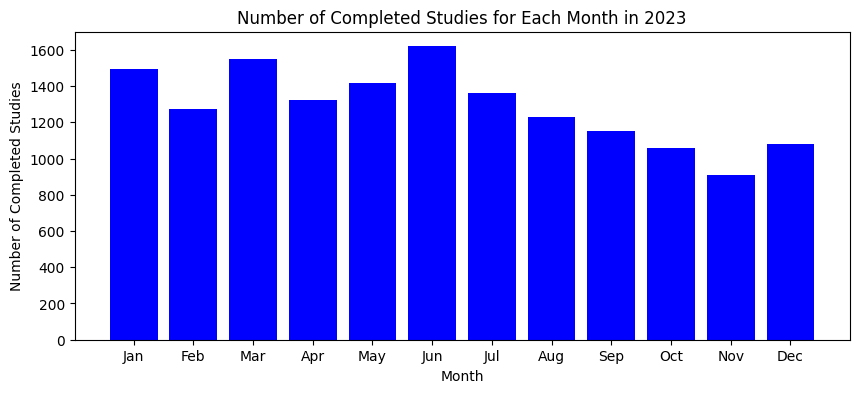

In [0]:
# Plot the data
plt.figure(figsize=(10, 4))
plt.bar(months, completed_studies, color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Number of Completed Studies for Each Month in 2023')
plt.show()

## EXTRA MARK
Comparison between the number of completed studies for 2020, 2021 and 2023

In [0]:
# Number of Completed Studies 2023
Year_2023 = clinicaltrial_2023.map(lambda col: [col[x] for x in [3, 13]]) \
    .filter(lambda x: x[0] == 'COMPLETED') \
    .map(lambda x: x[1]) \
    .filter(lambda x: x != '') \
    .map(lambda x: tuple(x.split('-'))) \
    .filter(lambda x: x[0] == '2023') \
    .map(lambda x: (x[1], 1))

Year_2023.count()

## change year to get count

15467

Visualization of the comparison of the number of Completed Studies between 2020, 2021, 2023.

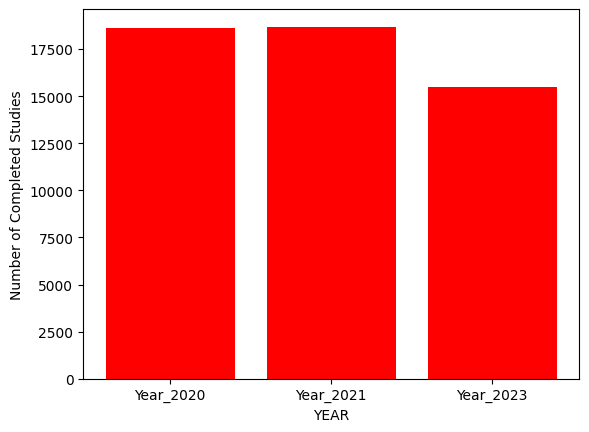

In [0]:
Completed_Studies = ['Year_2020', 'Year_2021', 'Year_2023']
count = [18615, 18689, 15467]
 
plt.bar (x = Completed_Studies, height = count, color = 'red')
plt.xlabel('YEAR')
plt.ylabel('Number of Completed Studies')
plt.show()

Counting the Status Occurrences in the clincal trial

In [0]:
# Group by status and count occurrences
status_counts_rdd = clinicaltrial_2023.map(lambda x: (x[3], 1)) \
                                       .reduceByKey(lambda a, b: a + b) \
                                       .sortBy(lambda x: x[1], ascending=True)

# Show the results
status_counts_rdd.collect()

[('INTERVENTIONAL', 1),
 ('TEMPORARILY_NOT_AVAILABLE', 26),
 ('APPROVED_FOR_MARKETING', 197),
 ('AVAILABLE', 259),
 ('NO_LONGER_AVAILABLE', 446),
 ('WITHHELD', 889),
 ('SUSPENDED', 1644),
 ('ENROLLING_BY_INVITATION', 3937),
 ('WITHDRAWN', 13718),
 ('ACTIVE_NOT_RECRUITING', 19716),
 ('NOT_YET_RECRUITING', 20098),
 ('TERMINATED', 28022),
 ('UNKNOWN', 64813),
 ('RECRUITING', 66158),
 ('COMPLETED', 263498)]